In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\DataSet\employee_data_for_cleaning.csv")
df.head(3)

,Employee_ID,Name,Age,Department,Salary,Date_of_Joining,Gender,Experience_Years
0,E0001,Employee_1,52.0,Finance,NaN,2012-04-01,Mle,14.5
1,E0002,Employee_2,31.0,NaN,31891.90,2019-08-16,Mle,5.2
2,E0003,Employee_3,33.0,HR,104236.84,2006-04-26,Mle,23.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Employee_ID       946 non-null    object 
 1   Name              892 non-null    object 
 2   Age               903 non-null    float64
 3   Department        826 non-null    object 
 4   Salary            893 non-null    float64
 5   Date_of_Joining   907 non-null    object 
 6   Gender            840 non-null    object 
 7   Experience_Years  904 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


# Checking missing values

In [4]:
df.isnull()

,Employee_ID,Name,Age,Department,Salary,Date_of_Joining,Gender,Experience_Years
0,False,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,True,True
997,False,True,False,True,False,False,True,False
998,False,True,True,False,False,True,False,False


In [5]:
df.isnull().sum()

Employee_ID          54
Name                108
Age                  97
Department          174
Salary              107
Date_of_Joining      93
Gender              160
Experience_Years     96
dtype: int64

In [6]:
df.shape

(1000, 8)

checking % of missing values per column

In [7]:
df.isnull().sum()/df.shape[0]*100

Employee_ID          5.4
Name                10.8
Age                  9.7
Department          17.4
Salary              10.7
Date_of_Joining      9.3
Gender              16.0
Experience_Years     9.6
dtype: float64

checing % of missing values in entire dataset

In [8]:
df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100

11.1125

# Plotting null values

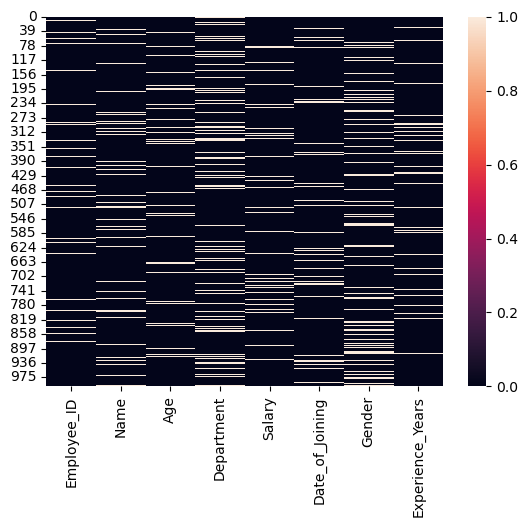

In [9]:
sns.heatmap(df.isnull())
plt.show()

# Data Cleaning

In [10]:
df.columns

Index(['Employee_ID', 'Name', 'Age', 'Department', 'Salary', 'Date_of_Joining',
       'Gender', 'Experience_Years'],
      dtype='object')

Drop column

In [11]:
df.drop(columns=['Date_of_Joining'],inplace=True)

In [12]:
df

,Employee_ID,Name,Age,Department,Salary,Gender,Experience_Years
0,E0001,Employee_1,52.0,Finance,NaN,Mle,14.5
1,E0002,Employee_2,31.0,NaN,31891.90,Mle,5.2
2,E0003,Employee_3,33.0,HR,104236.84,Mle,23.6
3,E0004,Employee_4,48.0,HR,55502.77,NaN,1.7
4,E0005,Employee_5,30.0,Finance,78869.83,Female,14.3
...,...,...,...,...,...,...,...
995,E0996,Employee_996,38.0,Marketing,49896.44,Female,19.3
996,E0997,Employee_997,40.0,Finance,75026.15,NaN,NaN
997,E0998,NaN,39.0,NaN,45228.27,NaN,33.8
998,E0999,NaN,NaN,Admin,30949.65,Male,7.6


# Handling Categorical Data

In [13]:
df.select_dtypes(include='object').isnull().sum()

Employee_ID     54
Name           108
Department     174
Gender         160
dtype: int64

Drop missing values from specific column

In [14]:
df=df.dropna(subset=['Name'])
df

,Employee_ID,Name,Age,Department,Salary,Gender,Experience_Years
0,E0001,Employee_1,52.0,Finance,NaN,Mle,14.5
1,E0002,Employee_2,31.0,NaN,31891.90,Mle,5.2
2,E0003,Employee_3,33.0,HR,104236.84,Mle,23.6
3,E0004,Employee_4,48.0,HR,55502.77,NaN,1.7
4,E0005,Employee_5,30.0,Finance,78869.83,Female,14.3
...,...,...,...,...,...,...,...
993,E0994,Employee_994,48.0,HR,67753.33,Non-binary,0.3
994,E0995,Employee_995,49.0,HR,89924.77,Male,3.4
995,E0996,Employee_996,38.0,Marketing,49896.44,Female,19.3
996,E0997,Employee_997,40.0,Finance,75026.15,NaN,NaN


Filling missing values by mode

In [15]:
df['Department'].mode()

0    Admin
Name: Department, dtype: object

In [16]:
df.loc[:, 'Department'] = df['Department'].fillna(df['Department'].mode()[0])
df

,Employee_ID,Name,Age,Department,Salary,Gender,Experience_Years
0,E0001,Employee_1,52.0,Finance,NaN,Mle,14.5
1,E0002,Employee_2,31.0,Admin,31891.90,Mle,5.2
2,E0003,Employee_3,33.0,HR,104236.84,Mle,23.6
3,E0004,Employee_4,48.0,HR,55502.77,NaN,1.7
4,E0005,Employee_5,30.0,Finance,78869.83,Female,14.3
...,...,...,...,...,...,...,...
993,E0994,Employee_994,48.0,HR,67753.33,Non-binary,0.3
994,E0995,Employee_995,49.0,HR,89924.77,Male,3.4
995,E0996,Employee_996,38.0,Marketing,49896.44,Female,19.3
996,E0997,Employee_997,40.0,Finance,75026.15,NaN,NaN


In [17]:
df['Gender'].unique()

array(['Mle', nan, 'Female', 'Male', 'Fmale', 'Non-binary'], dtype=object)

Replacing Mle to Male and Fmale to Female

In [18]:
df.loc[:, 'Gender'] = df['Gender'].replace({
    'Mle': 'Male',
    'Fmale':'Female'
})

In [19]:
df

,Employee_ID,Name,Age,Department,Salary,Gender,Experience_Years
0,E0001,Employee_1,52.0,Finance,NaN,Male,14.5
1,E0002,Employee_2,31.0,Admin,31891.90,Male,5.2
2,E0003,Employee_3,33.0,HR,104236.84,Male,23.6
3,E0004,Employee_4,48.0,HR,55502.77,NaN,1.7
4,E0005,Employee_5,30.0,Finance,78869.83,Female,14.3
...,...,...,...,...,...,...,...
993,E0994,Employee_994,48.0,HR,67753.33,Non-binary,0.3
994,E0995,Employee_995,49.0,HR,89924.77,Male,3.4
995,E0996,Employee_996,38.0,Marketing,49896.44,Female,19.3
996,E0997,Employee_997,40.0,Finance,75026.15,NaN,NaN


Filling missing values by ffill

In [20]:
df.loc[:,'Gender']=df['Gender'].ffill()
df

,Employee_ID,Name,Age,Department,Salary,Gender,Experience_Years
0,E0001,Employee_1,52.0,Finance,NaN,Male,14.5
1,E0002,Employee_2,31.0,Admin,31891.90,Male,5.2
2,E0003,Employee_3,33.0,HR,104236.84,Male,23.6
3,E0004,Employee_4,48.0,HR,55502.77,Male,1.7
4,E0005,Employee_5,30.0,Finance,78869.83,Female,14.3
...,...,...,...,...,...,...,...
993,E0994,Employee_994,48.0,HR,67753.33,Non-binary,0.3
994,E0995,Employee_995,49.0,HR,89924.77,Male,3.4
995,E0996,Employee_996,38.0,Marketing,49896.44,Female,19.3
996,E0997,Employee_997,40.0,Finance,75026.15,Female,NaN


# Handling Numerical Data

In [21]:
df.select_dtypes(include='float64').isnull().sum()

Age                 88
Salary              97
Experience_Years    86
dtype: int64

Filling null values by mean

In [22]:
df.loc[:,'Age']=df['Age'].fillna(df['Age'].mean())
df.head(3)

,Employee_ID,Name,Age,Department,Salary,Gender,Experience_Years
0,E0001,Employee_1,52.0,Finance,NaN,Male,14.5
1,E0002,Employee_2,31.0,Admin,31891.90,Male,5.2
2,E0003,Employee_3,33.0,HR,104236.84,Male,23.6


Filling null values by median

In [23]:
df.loc[:,'Salary']=df['Salary'].fillna(df['Salary'].median())
df.head(3)

,Employee_ID,Name,Age,Department,Salary,Gender,Experience_Years
0,E0001,Employee_1,52.0,Finance,76330.58,Male,14.5
1,E0002,Employee_2,31.0,Admin,31891.90,Male,5.2
2,E0003,Employee_3,33.0,HR,104236.84,Male,23.6


Filling null Values by constant value

In [24]:
df.loc[:,'Experience_Years']=df['Experience_Years'].fillna(0)
df.head(3)

,Employee_ID,Name,Age,Department,Salary,Gender,Experience_Years
0,E0001,Employee_1,52.0,Finance,76330.58,Male,14.5
1,E0002,Employee_2,31.0,Admin,31891.90,Male,5.2
2,E0003,Employee_3,33.0,HR,104236.84,Male,23.6


Checking again null values

In [25]:
df.isnull().sum()

Employee_ID         46
Name                 0
Age                  0
Department           0
Salary               0
Gender               0
Experience_Years     0
dtype: int64

Droping all null values from dataset

In [26]:
df=df.dropna()
df.head(3)

,Employee_ID,Name,Age,Department,Salary,Gender,Experience_Years
0,E0001,Employee_1,52.0,Finance,76330.58,Male,14.5
1,E0002,Employee_2,31.0,Admin,31891.90,Male,5.2
2,E0003,Employee_3,33.0,HR,104236.84,Male,23.6


In [27]:
df.isnull().sum()

Employee_ID         0
Name                0
Age                 0
Department          0
Salary              0
Gender              0
Experience_Years    0
dtype: int64

Plotting after removing null values

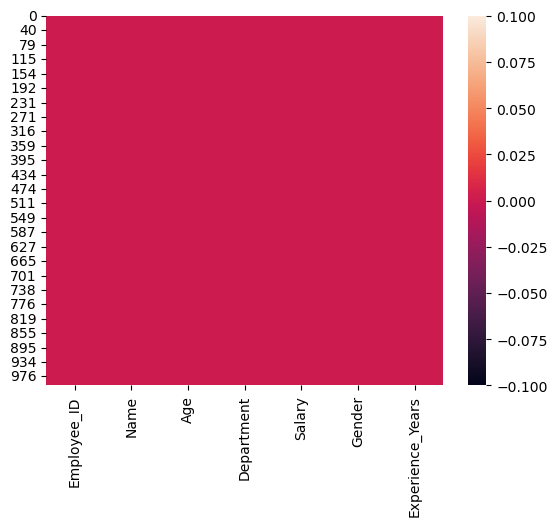

In [28]:
sns.heatmap(df.isnull())
plt.show()

In [29]:
df.head(3)

,Employee_ID,Name,Age,Department,Salary,Gender,Experience_Years
0,E0001,Employee_1,52.0,Finance,76330.58,Male,14.5
1,E0002,Employee_2,31.0,Admin,31891.90,Male,5.2
2,E0003,Employee_3,33.0,HR,104236.84,Male,23.6


# Encoding

In [30]:
df['Department'].unique()

array(['Finance', 'Admin', 'HR', 'Marketing', 'IT'], dtype=object)

Using Map

In [31]:
df.loc[:,'Department']=df['Department'].map({
    'Admin':1,
    'HR':2,
    'Finance':3,
    'Marketing':4,
    'IT':5
})

In [32]:
df.head(3)

,Employee_ID,Name,Age,Department,Salary,Gender,Experience_Years
0,E0001,Employee_1,52.0,3,76330.58,Male,14.5
1,E0002,Employee_2,31.0,1,31891.90,Male,5.2
2,E0003,Employee_3,33.0,2,104236.84,Male,23.6


In [33]:
df['Gender'].unique()

array(['Male', 'Female', 'Non-binary'], dtype=object)

Using get dummies

In [34]:
df=pd.get_dummies(df,columns=['Gender'])

In [35]:
df.head(3)

,Employee_ID,Name,Age,Department,Salary,Experience_Years,Gender_Female,Gender_Male,Gender_Non-binary
0,E0001,Employee_1,52.0,3,76330.58,14.5,False,True,False
1,E0002,Employee_2,31.0,1,31891.90,5.2,False,True,False
2,E0003,Employee_3,33.0,2,104236.84,23.6,False,True,False


# Outlier Removal

In [36]:
df.describe()

,Age,Salary,Experience_Years
count,846.000000,846.000000,846.000000
mean,38.235313,75032.056489,16.799173
std,11.452430,25342.702556,12.345439
min,18.000000,30083.650000,-2.000000
25%,29.000000,53682.785000,5.525000
50%,38.298507,76330.580000,16.850000
75%,47.000000,94988.242500,27.600000
max,59.000000,119914.450000,40.000000


In Experience Years the min value is -2 that is outlier so we will remove experience year less than 0

In [37]:
df.shape

(846, 9)

In [38]:
df=df[df['Experience_Years']>=0]
df.shape

(818, 9)

In [39]:
df.describe()

,Age,Salary,Experience_Years
count,818.000000,818.000000,818.000000
mean,38.202295,75019.988521,17.411125
std,11.439631,25274.298336,12.095158
min,18.000000,30083.650000,0.000000
25%,29.000000,53885.352500,6.550000
50%,38.298507,76330.580000,17.350000
75%,47.000000,94988.242500,27.950000
max,59.000000,119914.450000,40.000000


# In Age ans Salary we have no outliers but for practice purpose i am doing here..

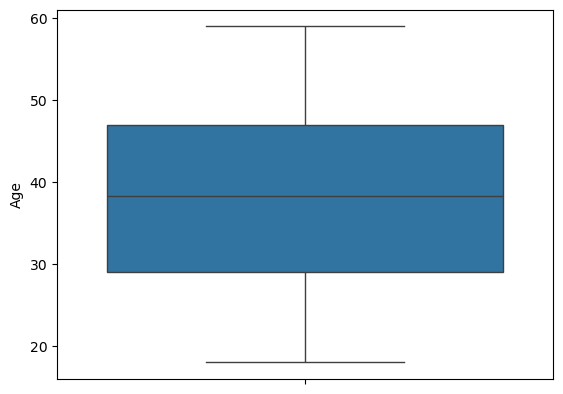

In [40]:
sns.boxplot(df['Age'])
plt.show()

Using IQR method

In [41]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(.75)
Q1,Q3

(29.0, 47.0)

In [42]:
IQR=Q3-Q1
IQR

18.0

In [43]:
min_range=Q1-(1.5*IQR)
max_range=Q3+(1.5*IQR)

min_range,max_range

(2.0, 74.0)

In [44]:
df=df[(df['Age']>=min_range) & (df['Age']<=max_range)]
df.shape

(818, 9)

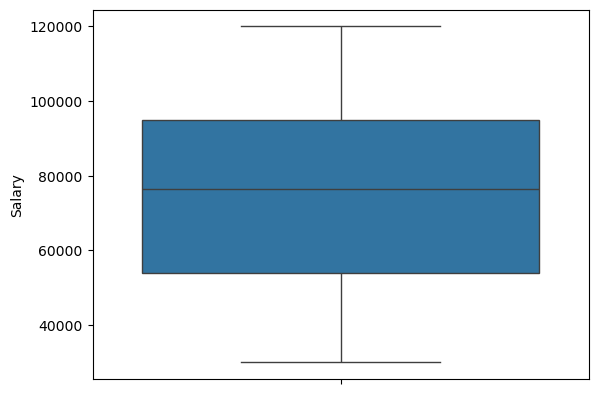

In [45]:
sns.boxplot(df['Salary'])
plt.show()

Using Z-score

In [46]:
df['Salary_zscore']=(df['Salary']-df['Salary'].mean())/df['Salary'].std()
df.head(3)

,Employee_ID,Name,Age,Department,Salary,Experience_Years,Gender_Female,Gender_Male,Gender_Non-binary,Salary_zscore
0,E0001,Employee_1,52.0,3,76330.58,14.5,False,True,False,0.051855
1,E0002,Employee_2,31.0,1,31891.90,5.2,False,True,False,-1.706401
2,E0003,Employee_3,33.0,2,104236.84,23.6,False,True,False,1.155991


In [47]:
# df = df[(df['Salary_zscore']>=-3) & (df['Salary_zscore']<=3)]
df=df[df['Salary_zscore'].abs()<3]
df.drop(columns=['Salary_zscore'],inplace=True)
df.head(3)

,Employee_ID,Name,Age,Department,Salary,Experience_Years,Gender_Female,Gender_Male,Gender_Non-binary
0,E0001,Employee_1,52.0,3,76330.58,14.5,False,True,False
1,E0002,Employee_2,31.0,1,31891.90,5.2,False,True,False
2,E0003,Employee_3,33.0,2,104236.84,23.6,False,True,False


In [48]:
df.shape

(818, 9)

# Feature Scaling

Standralization

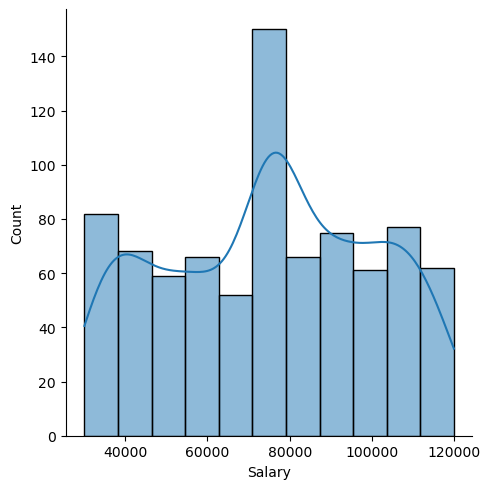

In [49]:
sns.displot(df['Salary'],kde=True)
plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler=StandardScaler()
df['Salary']=scaler.fit_transform(df[['Salary']])
df.head(3)

,Employee_ID,Name,Age,Department,Salary,Experience_Years,Gender_Female,Gender_Male,Gender_Non-binary
0,E0001,Employee_1,52.0,3,0.051886,14.5,False,True,False
1,E0002,Employee_2,31.0,1,-1.707445,5.2,False,True,False
2,E0003,Employee_3,33.0,2,1.156698,23.6,False,True,False


After scaling the data features are as same as before only magnitute reduced

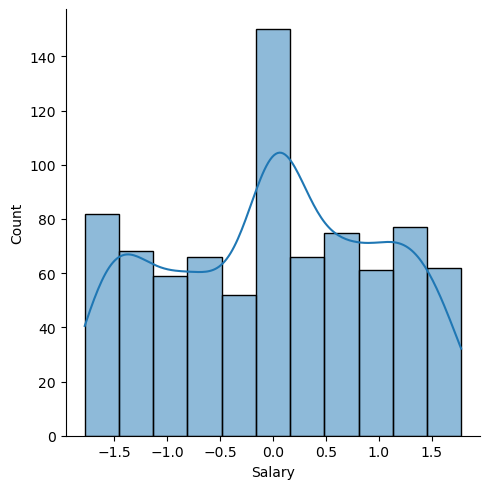

In [52]:
sns.displot(df['Salary'],kde=True)
plt.show()

Normalization

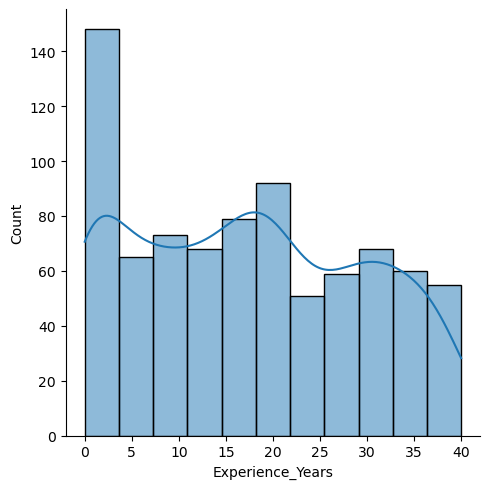

In [53]:
sns.displot(df['Experience_Years'],kde=True)
plt.show()

In [59]:
from sklearn.preprocessing import MinMaxScaler 

In [61]:
scaler1=MinMaxScaler()
df['Experience_Years']=scaler1.fit_transform(df[['Experience_Years']])
df.head(3)

,Employee_ID,Name,Age,Department,Salary,Experience_Years,Gender_Female,Gender_Male,Gender_Non-binary
0,E0001,Employee_1,52.0,3,0.051886,0.3625,False,True,False
1,E0002,Employee_2,31.0,1,-1.707445,0.1300,False,True,False
2,E0003,Employee_3,33.0,2,1.156698,0.5900,False,True,False


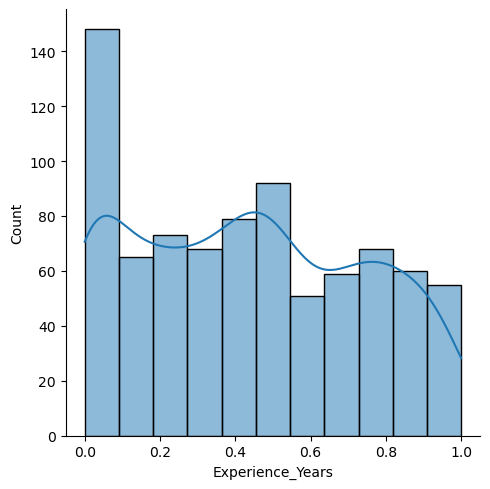

In [64]:
sns.displot(df['Experience_Years'],kde=True)
plt.show()

# Handling Duplicate

In [67]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
993    False
994    False
995    False
996    False
999    False
Length: 818, dtype: bool

In [69]:
df.shape

(818, 9)

In [74]:
df.drop_duplicates(inplace=True)
df.shape

(818, 9)

There were no duplicates in our dataset.

# Final Data

In [76]:
df

,Employee_ID,Name,Age,Department,Salary,Experience_Years,Gender_Female,Gender_Male,Gender_Non-binary
0,E0001,Employee_1,52.000000,3,0.051886,0.3625,False,True,False
1,E0002,Employee_2,31.000000,1,-1.707445,0.1300,False,True,False
2,E0003,Employee_3,33.000000,2,1.156698,0.5900,False,True,False
3,E0004,Employee_4,48.000000,2,-0.772688,0.0425,False,True,False
4,E0005,Employee_5,30.000000,3,0.152416,0.3575,True,False,False
...,...,...,...,...,...,...,...,...,...
993,E0994,Employee_994,48.000000,2,-0.287688,0.0075,False,False,True
994,E0995,Employee_995,49.000000,2,0.590082,0.0850,False,True,False
995,E0996,Employee_996,38.000000,4,-0.994644,0.4825,True,False,False
996,E0997,Employee_997,40.000000,3,0.000244,0.0000,True,False,False


# Save the cleaned dataset

In [77]:
df.to_csv("cleaned_employee_data.csv", index=False)
print(f"\nCleaned dataset saved to {"cleaned_employee_data.csv"}")


Cleaned dataset saved to cleaned_employee_data.csv
